# CIIC5015 - Introduction to Artificial Intelligence
Project III - Convolutional Neural Networks


---


## Objectives
1. Understand the design, implementation and use of deep learning models.
2. Understand the use of the convolutional neural networks for classification.
3. Gain experience by implementing AI applications using modern deep learning
frameworks.


---


## Overview
You will design, implement and test a neural network model using PyTorch and Jupyter
notebooks. These networks will be used to implement classification tasks on an image dataset.

## Classification

Classification
You will use the MINIST to develop a model that predicts class for each digit. Use the code
from p2 as a template, but now used convolutional layer. Here is a example on how to build a
convolutional network in PyTorch.

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

You can follow the same steps as in p2. But you will use the following networks:

1. Network 1 : 4-layer network
 * Layer 1 – convolution with 16 filters, each filter 5x5 with same padding
 * Layer 2 – ReLU activation
 * Layer 3 – Flatten layer
 * Layer 4 – fully connected layer with 10 neurons as output (using cross entropy
loss does the softmax)

2. Network 2 : 8-layer network
 * Layer 1 – convolution with 6 filters, each filter 5x5 with same padding
 * Layer 2 – ReLU activation
 * Layer 3 – convolution with 16 filters , each filter 5x5 with same padding
 * Layer 4 – ReLU activation
 * Layer 5 – flatten layer
 * Leyer 6 – fully connected layer with 84 neurons as ouput
 * Layer 7 – ReLU activation
 * Layer 8 - fully connected layer with 10 neurons as output (using cross entropy
loss does the softmax)

3. Network 3 : 14-layer network
 * Layer 1 – convolution with 6 filters , each filter 5x5 with same padding
 * Layer 2 – batch normalization for 6 filters
 * Layer 3 – ReLU activation
 * Layer 4 – Max pooling of size 2 (to halve de image)
 * Layer 5 – convolution with 16 filters , each filter 5x5 with same padding
 * Layer 6 – batch normalization for 16 filters
 * Layer 7 – ReLU activation
 * Layer 8 – Max pooling of size 2 (to halve de image)
 * Layer 9 – flatten layer
 * Leyer 10 – fully connected layer with 120 neurons as ouput
 * Layer 11 – ReLU activation
 * Leyer 12 – fully connected layer with 84 neurons as ouput
 * Layer 13 – ReLU activation
 * Layer 14 - fully connected layer with 10 neurons as output (using cross entropy
loss does the softmax)

All networks will use ReLU activation in the intermediate layers, but not in the final. Train for
20 epochs with learning rate of 0.01.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
from torchsummary import summary

### Prepare the data
The first step is to collect and preprocess the data. This includes separating the data into training and testing sets as well as creating their respective loaders. 


```
### Class Distribution
--> There are a total of 70000 instances.

LABELS        ID
zero          0
one           1
two           2
three         3
four          4
five          5
six           6
seven         7
eight         8
nine          9

```



Load and normalize training and test datasets.

In [2]:
transform = transforms.Compose(
    [transforms.Grayscale(),
     transforms.ToTensor(),
     transforms.Normalize(mean=0.5, std=0.5)])

batch_size = 4

# Load MNIST datasets
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transform,  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transform)

# Split training set into training and validation set
trainset_size = len(train_dataset)
validset_size = int(0.2 * trainset_size)  # validation set --> 20%
trainset_size -= validset_size  # training set --> 80%
train_dataset, valid_dataset = torch.utils.data.random_split(train_dataset,
                                                             [trainset_size, validset_size])

# Data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, 
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Classes information
classes = {
 0: 'zero',
 1: 'one',
 2: 'two',
 3: 'three',
 4: 'four',
 5: 'five',
 6: 'six',
 7: 'seven',
 8: 'eight',
 9: 'nine'}

100%|██████████| 9912422/9912422 [00:00<00:00, 45370994.97it/s]


Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 66962793.71it/s]

Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 27049223.62it/s]


Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12734310.67it/s]

Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw



Inspect the data.

In [3]:
print('\n', train_dataset)
print('\n', test_dataset)
print('\n', valid_dataset)

len(train_dataset + test_dataset)



 Dataset MNIST
    Number of datapoints: 10000
    Root location: ../../data
    Split: Test
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )



58000

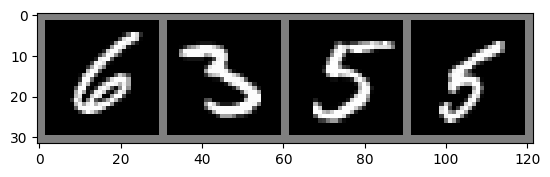

six   three five  five 


In [4]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels.numpy()[j]]:5s}' for j in range(batch_size)))

### Define the model architecture
Choose the number and categorization of your layers for your models. Then, define the loss function and optimizer.

CNN1 -> 4-layer network
 * Layer 1 – convolution with 16 filters, each filter 5x5 with same padding
 * Layer 2 – ReLU activation
 * Layer 3 – Flatten layer
 * Layer 4 – fully connected layer with 10 neurons as output (using cross entropy
loss does the softmax)

In [5]:
class CNN1(nn.Module):
  def __init__(self):
    super(CNN1, self).__init__()
    self.conv = nn.Conv2d(in_channels=1, out_channels=16,
                          kernel_size=5, padding=2)
    self.reLU = nn.ReLU()
    self.fc = nn.Linear(in_features=16*28*28, out_features=10)
    self.soft = nn.Softmax(dim=1)


  def forward(self, x):     
    x = self.reLU(self.conv(x))        # convolution layer - 16 5x5 filters
    x = torch.flatten(x,1)             # flatten all dimensions except batch                    # fully connected layer - 10 neurons as output
    x = self.soft(self.fc(x))          # fully connected layer - 10 output neurons

    return x


CNN2 -> 8-layer network
* Layer 1 - convolution with 6 filters, each filter 5x5 with same padding
* Layer 2 - ReLU activation
* Layer 3 - convolution with 16 filters, each filer 5x5 with same padding
* Layer 4 - ReLU activation
* Layer 5 - flatten layer
* Layer 6 - fully connected layer with 84 neurons as output
* Layer 7 - ReLU activation
* Layer 8 - fully connected layer with 10 neurons as output (using cross entropy
loss does the softmax)


In [6]:
class CNN2(nn.Module):
  def __init__(self):
    super(CNN2, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, 
                           kernel_size=5, padding=2)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, 
                           kernel_size=5, padding=5)
    self.reLU = nn.ReLU()
    self.fc1 = nn.Linear(in_features=16*34*34, out_features=84)
    self.fc2 = nn.Linear(in_features=84, out_features=10)
    self.soft = nn.Softmax(dim=1)


  def forward(self, x):
    x = self.reLU(self.conv1(x))    # convolutional layer - 6 5x5 filters
    x = self.reLU(self.conv2(x))    # convolutional layer - 16 5x5 filters
    x = torch.flatten(x, 1)         # flatten all dimensions except batch
    x = self.reLU(self.fc1(x))      # fully connected layer - 84 output neurons
    x = self.soft(self.fc2(x))      # fully connected layer - 10 output neurons

    return x

CNN3 -> 14-layer network
* Layer 1 - convolution with 6 filters, each filter 5x5 with same padding
* Layer 2 - batch normalization
* Layer 3 - ReLu activation
* Layer 4 - max pooling of size 2
* Layer 5 - convolution with 16 filters, each filter 5x5 with same padding
* Layer 6 - batch normalization for 16 filters
* Layer 7 - ReLU activation
* Layer 8 - max pooling of size 2
* Layer 9 - flatten layer
* Layer 10 - fully connected layer with 120 neurons as output
* Layer 11 - ReLU activation
* Layer 12 - fully connected layer with 84 neurons as output
* Layer 13 - ReLU activation
* Layer 14 - fully connected layer with 10 neurons as output (using cross entropy loss does the softmax)


In [7]:
class CNN3(nn.Module):
  def __init__(self):
    super(CNN3, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, 
                           kernel_size=5, padding=2)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16,
                           kernel_size=5, padding=2)
    self.norm1 = nn.BatchNorm2d(6)
    self.norm2 = nn.BatchNorm2d(16)
    self.reLU = nn.ReLU()
    self.maxp = nn.MaxPool2d(kernel_size=2)
    self.fc1 = nn.Linear(in_features=16*7*7, out_features= 120)
    self.fc2 = nn.Linear(in_features=120, out_features=84)
    self.fc3 = nn.Linear(in_features=84, out_features=10)
    self.soft = nn.Softmax(dim=1)


  def forward(self, x):
    x = self.maxp(self.reLU(self.norm1(self.conv1(x))))
        # convolutional layer - 6 5x5 filters
        # batch normalization - 6 filters
        # reLU activation
        # max pooling
        
    x = self.maxp(self.reLU(self.norm2(self.conv2(x))))
        # convolutional layer - 16 5x5 filters
        # batch normalization - 16 filters
        # reLU activation
        # max pooling

    x = torch.flatten(x,1)
        # flatten all dimensions expect batch

    x = self.reLU(self.fc1(x))    
        # fully connected layer - 120 output neurons
        # reLU activation    

    x = self.reLU(self.fc2(x))
        # fully connected layer - 84 output neurons
        # reLU activation  

    x = self.soft(self.fc3(x))
        # fully connecter layer - 10 output neurons
        # softmax

    return x

### Train the model
Training a model is a critical step in the machine learning pipeline as it involves the process of optimizing the model to perform well on a given task. The goal of training a model is to minimize the difference between its predicted outputs and the actual outputs (i.e., labels) in the training dataset. 

Assuming the data has already been pre-processed, training a model involves several tasks:

1. Model initialization: defining the structure of the neural network and initializing the weights and biases.

2. Forward pass: passing input data through the neural network to generate output predictions.

3. Compute loss: comparing the output predictions to the ground truth labels to calculate the loss or error.

5. Backward pass: propagating the loss backwards through the neural network to calculate the gradients of the weights and biases with respect to the loss.

7. Parameter updates: adjusting the weights and biases of the neural network based on the gradients calculated in the backward pass using optimization algorithms such as stochastic gradient descent (SGD).

8. Iteration: repeating the forward pass, backward pass, and parameter updates for multiple epochs until the model converges and the loss is minimized.

The goal of training a model is to minimize the loss on the training data while also achieving good performance on new, unseen data. This process involves finding the optimal balance between overfitting and underfitting, where the model is able to generalize well to new data without memorizing the training data.

The importance of training a model lies in its ability to generalize to new, unseen data. By minimizing the loss on the training data, the model can learn to recognize patterns in the data that generalize to new, unseen data. Without training, a model would not be able to learn from the data and would perform poorly on new, unseen data.

In summary, training a model is crucial for optimizing its parameters to minimize the difference between its predictions and actual outputs, thereby improving its ability to generalize to new, unseen data.

Prepare to train.

In [9]:
# Check Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set parameters
num_epochs = 20
learning_rate = 0.01

# Track errors
train_losses = [[],[],[]]
val_losses = [[],[],[]]

# Initialize models
model1 = CNN1().to(device)
print("CNN1: 4-layer \n")
summary(model1, (1,28,28))

print("CNN2: 8-layer \n")
model2 = CNN2().to(device)
summary(model2, (1,28,28))

print("CNN3: 14-layer \n")
model3 = CNN3().to(device)
summary(model3, (1,28,28))

# Define loss function and optimizers
criterion = nn.CrossEntropyLoss()

optimizer1 = torch.optim.SGD(model1.parameters(), lr=learning_rate)
optimizer2 = torch.optim.SGD(model2.parameters(), lr=learning_rate)
optimizer3 = torch.optim.SGD(model3.parameters(), lr=learning_rate)

CNN1: 4-layer 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             416
              ReLU-2           [-1, 16, 28, 28]               0
            Linear-3                   [-1, 10]         125,450
           Softmax-4                   [-1, 10]               0
Total params: 125,866
Trainable params: 125,866
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.19
Params size (MB): 0.48
Estimated Total Size (MB): 0.67
----------------------------------------------------------------
CNN2: 8-layer 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              ReLU-2            [-1, 6, 28, 28]               0
         

CNN1 - Training

In [ ]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        images, digits = data

        # zero the parameter gradients
        optimizer1.zero_grad()

        # forward + backward + optimize
        outputs = model1(images)
        loss = criterion(outputs, digits)
        loss.backward()
        optimizer1.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print ('Epoch [{}/{}], Step [{}/{}], Training Loss: {:.4f}' 
                .format(epoch+1, num_epochs, i+1, total_step, running_loss/500))
            running_loss = 0.0

print('Finished Training')

Epoch [1/20], Step [500/12000], Training Loss: 2.0177
Epoch [1/20], Step [1000/12000], Training Loss: 1.7462
Epoch [1/20], Step [1500/12000], Training Loss: 1.7002
Epoch [1/20], Step [2000/12000], Training Loss: 1.6690
Epoch [1/20], Step [2500/12000], Training Loss: 1.6469
Epoch [1/20], Step [3000/12000], Training Loss: 1.6293
Epoch [1/20], Step [3500/12000], Training Loss: 1.6496
Epoch [1/20], Step [4000/12000], Training Loss: 1.6294
Epoch [1/20], Step [4500/12000], Training Loss: 1.6352
Epoch [1/20], Step [5000/12000], Training Loss: 1.6001
Epoch [1/20], Step [5500/12000], Training Loss: 1.5574
Epoch [1/20], Step [6000/12000], Training Loss: 1.5369
Epoch [1/20], Step [6500/12000], Training Loss: 1.5469
Epoch [1/20], Step [7000/12000], Training Loss: 1.5335
Epoch [1/20], Step [7500/12000], Training Loss: 1.5370
Epoch [1/20], Step [8000/12000], Training Loss: 1.5393
Epoch [1/20], Step [8500/12000], Training Loss: 1.5275
Epoch [1/20], Step [9000/12000], Training Loss: 1.5233
Epoch [1/20

CNN2 - Training

In [ ]:
total_step = len(train_loader)
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        images, digits = data

        # zero the parameter gradients
        optimizer2.zero_grad()

        # forward + backward + optimize
        outputs = model2(images)
        loss = criterion(outputs, digits)
        loss.backward()
        optimizer2.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print ('Epoch [{}/{}], Step [{}/{}], Training Loss: {:.4f}' 
                .format(epoch+1, num_epochs, i+1, total_step, running_loss/500))
            running_loss = 0.0

print('Finished Training')

Epoch [1/20], Step [500/12000], Training Loss: 2.2990
Epoch [1/20], Step [1000/12000], Training Loss: 2.2277
Epoch [1/20], Step [1500/12000], Training Loss: 1.7859
Epoch [1/20], Step [2000/12000], Training Loss: 1.6738
Epoch [1/20], Step [2500/12000], Training Loss: 1.6594
Epoch [1/20], Step [3000/12000], Training Loss: 1.6498
Epoch [1/20], Step [3500/12000], Training Loss: 1.6419
Epoch [1/20], Step [4000/12000], Training Loss: 1.6347
Epoch [1/20], Step [4500/12000], Training Loss: 1.6257
Epoch [1/20], Step [5000/12000], Training Loss: 1.6292
Epoch [1/20], Step [5500/12000], Training Loss: 1.6364
Epoch [1/20], Step [6000/12000], Training Loss: 1.6122
Epoch [1/20], Step [6500/12000], Training Loss: 1.6061
Epoch [1/20], Step [7000/12000], Training Loss: 1.6047
Epoch [1/20], Step [7500/12000], Training Loss: 1.6086
Epoch [1/20], Step [8000/12000], Training Loss: 1.6002
Epoch [1/20], Step [8500/12000], Training Loss: 1.6013
Epoch [1/20], Step [9000/12000], Training Loss: 1.6031
Epoch [1/20

CNN3 - Training

In [10]:
total_step = len(train_loader)
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        images, digits = data

        # zero the parameter gradients
        optimizer3.zero_grad()

        # forward + backward + optimize
        outputs = model3(images)
        loss = criterion(outputs, digits)
        loss.backward()
        optimizer3.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print ('Epoch [{}/{}], Step [{}/{}], Training Loss: {:.4f}' 
                .format(epoch+1, num_epochs, i+1, total_step, running_loss/500))
            running_loss = 0.0

print('Finished Training')

Epoch [1/20], Step [500/12000], Training Loss: 2.2924
Epoch [1/20], Step [1000/12000], Training Loss: 2.1991
Epoch [1/20], Step [1500/12000], Training Loss: 1.8775
Epoch [1/20], Step [2000/12000], Training Loss: 1.6981
Epoch [1/20], Step [2500/12000], Training Loss: 1.6119
Epoch [1/20], Step [3000/12000], Training Loss: 1.5660
Epoch [1/20], Step [3500/12000], Training Loss: 1.5484
Epoch [1/20], Step [4000/12000], Training Loss: 1.5384
Epoch [1/20], Step [4500/12000], Training Loss: 1.5318
Epoch [1/20], Step [5000/12000], Training Loss: 1.5299
Epoch [1/20], Step [5500/12000], Training Loss: 1.5225
Epoch [1/20], Step [6000/12000], Training Loss: 1.5200
Epoch [1/20], Step [6500/12000], Training Loss: 1.5188
Epoch [1/20], Step [7000/12000], Training Loss: 1.5245
Epoch [1/20], Step [7500/12000], Training Loss: 1.5054
Epoch [1/20], Step [8000/12000], Training Loss: 1.5081
Epoch [1/20], Step [8500/12000], Training Loss: 1.5050
Epoch [1/20], Step [9000/12000], Training Loss: 1.5102
Epoch [1/20

### Validate and test model results
Validating and testing your model is an essential step in the machine learning pipeline as it provides a way to assess the performance of your model on data it has not seen before. During training, your model learns to optimize its parameters based on the training data, but it's important to check if the model can generalize to unseen data.

Validation and testing allow you to estimate the model's performance on new data, giving you an idea of how well the model is likely to perform in the real world. By comparing the performance on the training set, validation set, and test set, you can check if your model is overfitting, underfitting, or generalizing well. This information can help you improve your model by adjusting its architecture or changing the hyperparameters.

In summary, validating and testing your model is critical for ensuring that it performs well on new data and helps you to make informed decisions about model design and hyperparameters.

#### Validation Phase

In [ ]:
val_loss = 0
val_accuracy = 0
with torch.no_grad():
    for inputs, targets in valid_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model1(inputs)
        loss = criterion(outputs, targets)
        val_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        val_accuracy += (predicted == targets).sum().item()

val_loss /= len(valid_loader.dataset)
val_accuracy /= len(valid_loader.dataset)

print("CNN1: \n")
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {100 * val_accuracy:.2f}%')

CNN1: 

Validation Loss: 2.3035, Validation Accuracy: 6.65%


In [ ]:
val_loss = 0
val_accuracy = 0
with torch.no_grad():
    for inputs, targets in valid_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model2(inputs)
        loss = criterion(outputs, targets)
        val_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        val_accuracy += (predicted == targets).sum().item()

val_loss /= len(valid_loader.dataset)
val_accuracy /= len(valid_loader.dataset)

print("CNN2: \n")
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {100 * val_accuracy:.2f}%')

CNN2: 

Validation Loss: 2.3024, Validation Accuracy: 10.08%


In [ ]:
val_loss = 0
val_accuracy = 0
with torch.no_grad():
    for inputs, targets in valid_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model3(inputs)
        loss = criterion(outputs, targets)
        val_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        val_accuracy += (predicted == targets).sum().item()

val_loss /= len(valid_loader.dataset)
val_accuracy /= len(valid_loader.dataset)

print("CNN3: \n")
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {100 * val_accuracy:.2f}%')

CNN3: 

Validation Loss: 2.3024, Validation Accuracy: 8.18%


#### Test Phase

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network (CNN1) on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network (CNN1) on the test images: 7 %


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network (CNN2) on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network (CNN2) on the test images: 9 %


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network (CNN3) on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network (CNN3) on the test images: 7 %


## Q&A
Which of the models had the least amount of error for validation? 


```
While both CNN2 and CNN3 had a validation loss of 2.3024, 
CNN2 had a higher validation accuracy with 10.08%.
```



How long it took to train each model?


```
CNN1 took aproximately 20 minutes to train.
CNN2 took more than an hour to train.
CNN3 took approximately 20 minutes to train.
```

